# ML T-Generation Занятие 2: Data Wrangling Основы работы с векторными данными и визуализацией. NumPy, Pandas и matplotlib.

# Pandas

**Pandas** - это библиотека Python, предоставляющая широкие возможности для анализа данных. С ее помощью очень удобно загружать, обрабатывать и анализировать табличные данные с помощью SQL-подобных запросов. В связке с библиотеками Matplotlib и Seaborn появляется возможность удобного визуального анализа табличных данных.

In [1]:
import pandas as pd
import numpy as np
#магия для отображения графиков в тетрадке
%matplotlib inline 

На первое время хорошо держать под рукой шпаргалку с набором полезных функций

In [ ]:
from IPython.display import Image
Image('pandas1.png') 

In [ ]:
from IPython.display import Image
Image('pandas2.jpg') 

Основными структурами данных в Pandas являются классы Series и DataFrame. Первый из них представляет собой одномерный индексированный массив данных некоторого фиксированного типа. Второй - это двухмерная структура данных, представляющая собой таблицу, каждый столбец которой содержит данные одного типа. Можно представлять её как словарь объектов типа Series. Структура DataFrame отлично подходит для представления реальных данных: строки соответствуют признаковым описаниям отдельных объектов, а столбцы соответствуют признакам.

Для начала рассмотрим простые примеры создания таких объектов и возможных операций над ними.

### Series

** Создание объекта Series из 5 элементов, индексированных буквами:**

In [ ]:
salaries = pd.Series([400, 300, 200, 250], 
              index = ['Andrew', 'Bob', 
                       'Charles', 'Ann']) 
salaries                                                               

In [ ]:
# тут можно наблюдать "консистентность" между библиотеками numpy и pandas
salaries[salaries > 250]

**Индексирование возможно в виде s.Name или s['Name'].**

In [ ]:
salaries.Andrew == salaries['Andrew']

In [ ]:
salaries['Andrew'], salaries.Andrew

**Series поддерживает пропуски в данных.**

In [ ]:
salaries['Carl'] = np.nan
salaries

In [ ]:
salaries['Carl']

In [ ]:
salaries

In [ ]:
salaries.fillna(salaries.median(), inplace=True)

In [ ]:
salaries

**Объекты Series похожи на ndarray и могут быть переданы в качестве аргументов большинству функций из Numpy.**

In [ ]:
print('Второй элемент серии', salaries[1], '\n')
# Smart indexing
print(salaries[:3], '\n')
print(len(salaries[salaries > 0]), 'Положительных значение\n')

In [ ]:
salaries

Можно передавать в функции numpy

In [ ]:
print(np.exp(salaries))

### DataFrame

### Создание и изменение

**Альтернативным способом является создание DataFrame из словаря numpy массивов или списков.**

In [ ]:
df2 = pd.DataFrame({'A': np.random.random(5), 
                    'B': ['a', 'b', 'c', 'd', 'e'], 
                    'C': np.arange(5) > 2})
df2

In [ ]:
type(df2)

**Обращение к элементам (или целым кускам фрейма):**

In [ ]:
print('Элемент на 3 позиции в столбце 3 = ', df2.at[3, 'B'], '\n')
print(df2.loc[1:4, 'A':'C'])

**Изменение элементов и добавление новых:**

In [ ]:
df2.at[2, 'B'] = 'f'
df2

In [ ]:
df2.loc[4]

In [ ]:
df2.loc[5] = [3.1415, 'c', False]
df2

In [ ]:
df1 = df2.copy()
df1

In [ ]:
df1.columns = ['A', 'B', 'C']
df3 = df1.append(df2)
df3

#### Обработка пропущенных значений

In [ ]:
df1.at['o2', 'A'] = np.nan
df1.at['o4', 'C'] = np.nan
df1

**Булева маска для пропущенных значений (True - там, где был пропуск, иначе - False):**

In [ ]:
pd.isnull(df1)

**Можно удалить все строки, где есть хотя бы один пропуск.**

In [ ]:
df1

In [ ]:
df1.dropna(axis=0)

In [ ]:
df1

In [ ]:
df1.shape

In [ ]:
df1.shape[0]*[0]

In [ ]:
df1['D'] = df1.shape[0]*[np.nan]

In [ ]:
df1

In [ ]:
df1.dropna(how='all', axis=1)

**Пропуски можно заменить каким-то значением.**

In [ ]:
df1.fillna()

## Пример первичного анализа данных с Pandas

In [5]:
import os
import pandas as pd

Рассмотрим данную библиотеку на примере [данных](https://www.kaggle.com/c/titanic/data) [соревнования](https://www.kaggle.com/c/titanic) о предсказании судьбы пассажиров лайнера "Титаник". Имеется некоторая информация о пассажирах, по которой необходимо предсказать выживаемость каждого из них.
* Какого типа данная задача?
* Что является объектами?
* Что является ответами?
* Какие могут быть признаки? Какие у них типы?

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Скачаем данные:

In [7]:
pass_data = pd.read_csv('/content/drive/MyDrive/Тинькофф.Поколение/titanic.csv', sep='\t')

Данные представляют из себя таблицу, где строка — объект, столбец — признак. Для экономии места можно выводить заданное количество первых строк объекта при помощи метода head():

In [10]:
pass_data.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
146,147,1,3,"Andersson, Mr. August Edvard (""Wennerstrom"")",male,27.0,0,0,350043,7.7958,NaN,S
147,148,0,3,"Ford, Miss. Robina Maggie ""Ruby""",female,9.0,2,2,W./C. 6608,34.3750,NaN,S
148,149,0,2,"Navratil, Mr. Michel (""Louis M Hoffman"")",male,36.5,0,2,230080,26.0000,F2,S
149,150,0,2,"Byles, Rev. Thomas Roussel Davids",male,42.0,0,0,244310,13.0000,NaN,S
150,151,0,2,"Bateman, Rev. Robert James",male,51.0,0,0,S.O.P. 1166,12.5250,NaN,S
151,152,1,1,"Pears, Mrs. Thomas (Edith Wearne)",female,22.0,1,0,113776,66.6000,C2,S
152,153,0,3,"Meo, Mr. Alfonzo",male,55.5,0,0,A.5. 11206,8.0500,NaN,S
153,154,0,3,"van Billiard, Mr. Austin Blyler",male,40.5,0,2,A/5. 851,14.5000,NaN,S
154,155,0,3,"Olsen, Mr. Ole Martin",male,NaN,0,0,Fa 265302,7.3125,NaN,S
155,156,0,1,"Williams, Mr. Charles Duane",male,51.0,0,1,PC 17597,61.3792,NaN,C


In [9]:
pass_data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [11]:
pass_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
151,152,1,1,"Pears, Mrs. Thomas (Edith Wearne)",female,22.0,1,0,113776,66.6000,C2,S
152,153,0,3,"Meo, Mr. Alfonzo",male,55.5,0,0,A.5. 11206,8.0500,NaN,S
153,154,0,3,"van Billiard, Mr. Austin Blyler",male,40.5,0,2,A/5. 851,14.5000,NaN,S
154,155,0,3,"Olsen, Mr. Ole Martin",male,NaN,0,0,Fa 265302,7.3125,NaN,S


Посмотрим на признаки:

In [12]:
pass_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

В этом ноутбуке мы думали, что названия столбцов начинаются с маленькой буквы, а в данных первая буква заглавная, придется исправить:

In [13]:
pass_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  156 non-null    int64  
 1   Survived     156 non-null    int64  
 2   Pclass       156 non-null    int64  
 3   Name         156 non-null    object 
 4   Sex          156 non-null    object 
 5   Age          126 non-null    float64
 6   SibSp        156 non-null    int64  
 7   Parch        156 non-null    int64  
 8   Ticket       156 non-null    object 
 9   Fare         156 non-null    float64
 10  Cabin        31 non-null     object 
 11  Embarked     155 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 14.8+ KB


In [14]:
pass_data = pass_data.rename(str.lower, axis="columns")

По данным можно индексироваться при помощи номеров строк/столбцов или названий признаков:

In [15]:
pass_data[2:5]

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.050,NaN,S


In [16]:
pass_data.iloc[1:5, 1:3]

,survived,pclass
1,1,1
2,1,3
3,1,1
4,0,3


In [17]:
pass_data.loc[1:5, "survived":"pclass"]

,survived,pclass
1,1,1
2,1,3
3,1,1
4,0,3
5,0,3


In [18]:
pass_data['name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: name, dtype: object

In [19]:
pass_data[['name', 'sex', 'pclass']].head()

,name,sex,pclass
0,"Braund, Mr. Owen Harris",male,3
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1
2,"Heikkinen, Miss. Laina",female,3
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1
4,"Allen, Mr. William Henry",male,3


Также действует и логическая индексация, которая позволяет рассматривать определенные группы объектов:

In [20]:
pass_data[pass_data['sex'] == 'female'].head() # женщины на борту

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [21]:
pass_data.shape

(156, 12)

In [23]:
# TASK: вывести женщин старше 60 и мужчины на борту
# Ваш код здесь
pass_data[((pass_data['sex'] == 'female') & (pass_data['age'] > 60)) | (pass_data['sex'] == 'male')]

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
150,151,0,2,"Bateman, Rev. Robert James",male,51.0,0,0,S.O.P. 1166,12.5250,NaN,S
152,153,0,3,"Meo, Mr. Alfonzo",male,55.5,0,0,A.5. 11206,8.0500,NaN,S
153,154,0,3,"van Billiard, Mr. Austin Blyler",male,40.5,0,2,A/5. 851,14.5000,NaN,S
154,155,0,3,"Olsen, Mr. Ole Martin",male,NaN,0,0,Fa 265302,7.3125,NaN,S


& - и | - или

In [25]:
# TASK: Посмотрим, сколько на борту было относительно молодых женщин,
# путешествующих в одиночку. Скорее всего, довольно мало,
# потому что в такое длительное путешествие молодых девушек одних не отпустили бы опекающие родственники.
# Ваш код здесь
inf_data = pass_data[(pass_data['sex'] == 'female') & (pass_data['age'] < 25)]
inf_data

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S
22,23,1,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,330923,8.0292,NaN,Q
24,25,0,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,21.0750,NaN,S
38,39,0,3,"Vander Planke, Miss. Augusta Maria",female,18.0,2,0,345764,18.0000,NaN,S
39,40,1,3,"Nicola-Yarred, Miss. Jamila",female,14.0,1,0,2651,11.2417,NaN,C
43,44,1,2,"Laroche, Miss. Simonne Marie Anne Andree",female,3.0,1,2,SC/Paris 2123,41.5792,NaN,C
44,45,1,3,"Devaney, Miss. Margaret Delia",female,19.0,0,0,330958,7.8792,NaN,Q
49,50,0,3,"Arnold-Franchi, Mrs. Josef (Josefine Franchi)",female,18.0,1,0,349237,17.8000,NaN,S


In [26]:
inf_data.shape

(26, 12)

Кроме того, для заданного признака можно построить гистограмму:

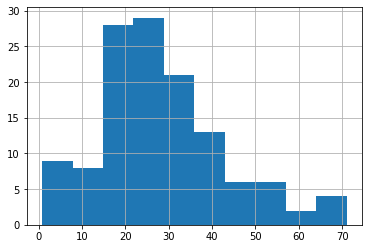

In [27]:
pass_data.age.hist(bins = 10)

## Редактирование DataFrame

* Переименование признаков

In [ ]:
pass_data.rename(columns={'sex': 'Sex'}, inplace=True)
pass_data.head()

* Применение преобразования к существующему признаку. Например, выделим фамилию:

In [28]:
# TASK: написать функцию возвращающее фамилию
def get_last_name(name):
    return name.split(',')[0]

In [33]:
last_names = list(map(lambda x: get_last_name(x), pass_data['name']))

* Добавление признака

In [34]:
pass_data['Last_name'] = last_names
pass_data.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,Last_name
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen


* Удаление признака

In [35]:
pass_data.drop('Last_name', axis=1).head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [36]:
pass_data.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,Last_name
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen


In [37]:
pass_data.drop('Last_name', axis=1, inplace=True)
pass_data.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


* Работа с пропущенными данными

In [38]:
pass_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  156 non-null    int64  
 1   survived     156 non-null    int64  
 2   pclass       156 non-null    int64  
 3   name         156 non-null    object 
 4   sex          156 non-null    object 
 5   age          126 non-null    float64
 6   sibsp        156 non-null    int64  
 7   parch        156 non-null    int64  
 8   ticket       156 non-null    object 
 9   fare         156 non-null    float64
 10  cabin        31 non-null     object 
 11  embarked     155 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 14.8+ KB


Методы isnull() и notnull() позволяют получить бинарный массив, отражающий отсутствие или наличие данных для каждого из объектов соответственно:

In [39]:
pass_data['cabin'].isnull().head()

pass_data[pass_data['cabin'].notnull()].head() # пассажиры с известным номером шлюпки эвакуации

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


* Сортировка объектов/признаков

In [40]:
pass_data.sort_values(by=['pclass', 'fare'], ascending=True).head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
136,137,1,1,"Newsom, Miss. Helen Monypeny",female,19.0,0,2,11752,26.2833,D47,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
30,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,C
64,65,0,1,"Stewart, Mr. Albert A",male,NaN,0,0,PC 17605,27.7208,NaN,C
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C


In [41]:
pass_data.sort_values(by=['pclass', 'fare'], ascending=[True, False]).head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
62,63,0,1,"Harris, Mr. Henry Birkhardt",male,45.0,1,0,36973,83.4750,C83,S


## Группировка данных

Группировка при помощи метода groupby позволяет объединять данные в группы по одному или нескольким признакам и считать по ним общую статистику.

In [46]:
pass_data.groupby('sex') # разбиение всех объектов на 2 группы по полу

In [44]:
pass_data.groupby('sex')['pclass'].value_counts()

sex     pclass
female  3         35
        2         12
        1          9
male    3         61
        1         21
        2         18
Name: pclass, dtype: int64

In [47]:
pass_data.groupby('pclass')['fare'].describe()

,count,mean,std,min,25%,50%,75%,max
pclass,,,,,,,,
1,30.0,79.50194,65.172104,26.2833,48.290625,61.6792,78.721875,263.0000
2,30.0,23.65972,16.048141,10.5000,13.000000,21.0000,27.312500,73.5000
3,96.0,13.44006,9.998511,6.7500,7.854200,8.0500,15.309350,56.4958


In [49]:
pass_data.groupby('sex')['age'].mean() # средний возраст для пассажиров каждого из полов

sex
female    24.468085
male      30.326962
Name: age, dtype: float64

Как известно, в первую очередь спасали женщин и детей в порядке повышения номера класса, в связи с этим доля выживших женщин, вероятно, будет выше, чем доля выживших мужчин. Проверим:

In [51]:
pass_data.groupby('sex')['survived'].mean()

sex
female    0.714286
male      0.140000
Name: survived, dtype: float64

Аналогично для пассажиров различных классов:

In [52]:
pass_data.groupby('pclass')[['survived', 'age']].mean()

,survived,age
pclass,,
1,0.400000,38.111111
2,0.466667,28.114828
3,0.291667,24.307143


Рассмотренные выше статистические данные могут быть рассмотрены и в виде стандартного DataFrame:

In [54]:
pass_data.groupby('sex', as_index=False)['survived'].mean()

,sex,survived
0,female,0.714286
1,male,0.140000


## Сохранение данных

Также данные можно сохранить в файл:

In [55]:
pass_data.to_csv('titanic_2.csv', index=False)

# Самостоятельная работа  №2 

In [56]:
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']


In [57]:
# 1. создать датафрейм
data = pd.DataFrame(data, labels)
data.head()

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no


In [58]:
# Вывести первые 3 строки
data[0:3]

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no


In [59]:
# Вывести значения где пропущены age
data[data['age'].isnull()]

,animal,age,visits,priority
d,dog,NaN,3,yes
h,cat,NaN,1,yes


In [61]:
# Вывести сумму всех посещений
data['visits'].sum()

19

In [71]:
# Посчитать количество каждого типа в колонке animal
data['animal'].value_counts()

dog      4
cat      4
snake    2
Name: animal, dtype: int64

In [72]:
# Сохранить в формате csv
data.to_csv('animals.csv', index=False)